# Some Important Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble  import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Importing Dataset

In [2]:
hr_data =pd.read_csv('HR_Data.csv')
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We know that, In the dataset features like Work_accident, left, promotion_last_5years, sales, salary are actually have catogorical values. But now these are exist in int or object datatypes. We have to change that 

In [4]:
cat_features = ['Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

for i in cat_features:
    hr_data[i] = hr_data[i].astype('category')

In [5]:
hr_data['number_project'] = hr_data['number_project'].astype('int')
hr_data['average_montly_hours'] = hr_data['average_montly_hours'].astype('int')
hr_data['time_spend_company'] = hr_data['time_spend_company'].astype('int')

In [6]:
hr_data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int32
average_montly_hours        int32
time_spend_company          int32
Work_accident            category
left                     category
promotion_last_5years    category
sales                    category
salary                   category
dtype: object

In [7]:
hr_data.describe(include=['category']).T

,count,unique,top,freq
Work_accident,14999,2,0,12830
left,14999,2,0,11428
promotion_last_5years,14999,2,0,14680
sales,14999,10,sales,4140
salary,14999,3,low,7316


In [8]:
hr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0


# Missing Values

In [9]:
hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

We can't find any Missing values here

# Exploratory Data Analysis

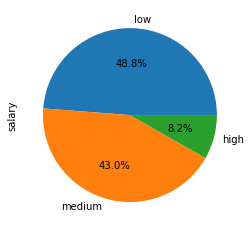

In [10]:
hr_data['salary'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

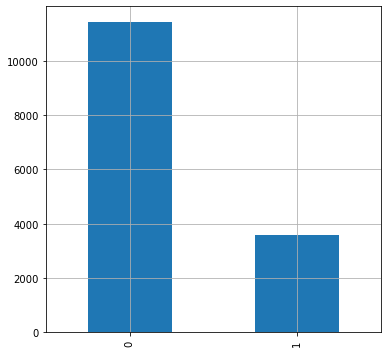

In [11]:
hr_data['left'].value_counts().plot(kind='bar',figsize=(6,6))
plt.grid()
plt.show()

In [12]:
hr_data['sales'].unique()

['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
Categories (10, object): ['sales', 'accounting', 'hr', 'technical', ..., 'IT', 'product_mng', 'marketing', 'RandD']

<AxesSubplot:ylabel='sales'>

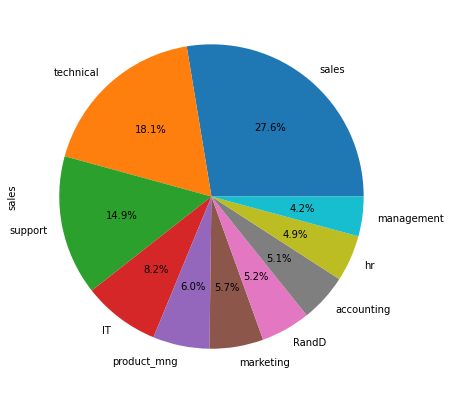

In [13]:
hr_data['sales'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))

In [14]:
d = hr_data[hr_data['left']==1]['sales']

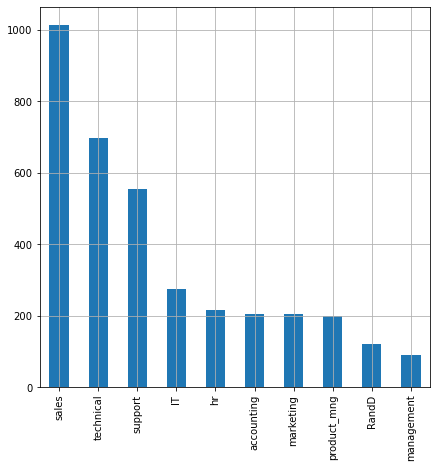

In [15]:
d.value_counts().plot(kind='bar',label='left',figsize=(7,7))
plt.grid()
plt.show()

In [16]:
d2 = hr_data[hr_data['promotion_last_5years']==1]['sales']

<AxesSubplot:>

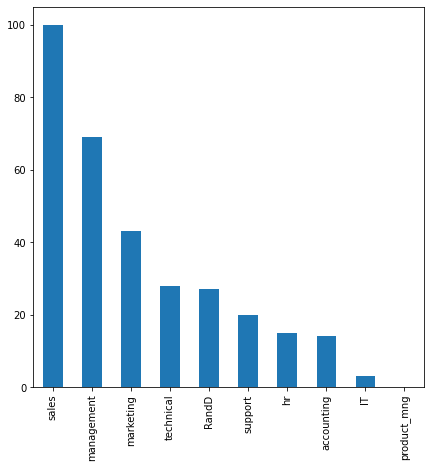

In [17]:
d2.value_counts().plot(kind='bar',figsize=(7,7))

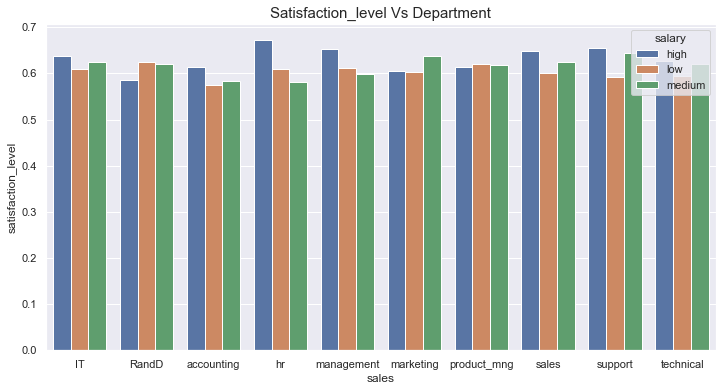

In [18]:
sns.set()#sets the style of the plot.
fig = plt.figure(figsize=(12,6))#Used to display the plot
sns.barplot(x='sales', y='satisfaction_level', hue='salary', data=hr_data, ci=None)
plt.title("Satisfaction_level Vs Department", size=15)
plt.show()

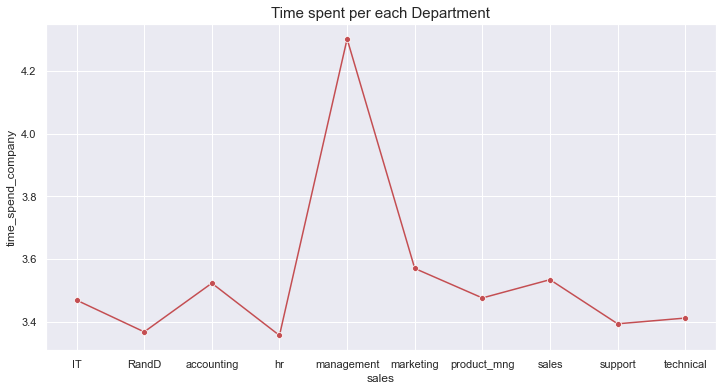

In [19]:
fig = plt.figure(figsize=(12,6))
sns.lineplot(x='sales', y='time_spend_company', data=hr_data, ci=None, color='r', marker='o')
plt.title("Time spent per each Department", size=15)
plt.show()

<AxesSubplot:>

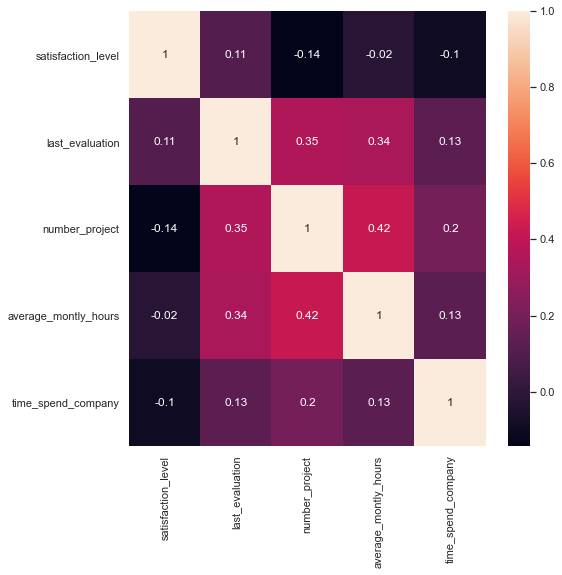

In [20]:
corr = hr_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

we find that there is no strong dependency between any 2 scale features

# Outliers

In [21]:
hr_data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int32
average_montly_hours        int32
time_spend_company          int32
Work_accident            category
left                     category
promotion_last_5years    category
sales                    category
salary                   category
dtype: object

In [22]:
sub_data = hr_data.select_dtypes(['int','float'])

In [23]:
features = sub_data.columns

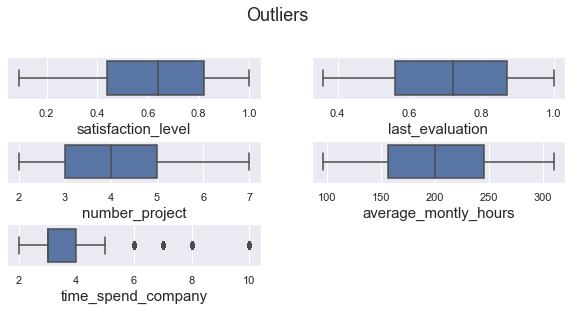

In [24]:
plt.figure(figsize=(10,10))
plt.suptitle("Outliers", fontsize=18, y=0.95)
plt.subplots_adjust(hspace=1)

for x in enumerate(features):
    plt.subplot(7,2,x[0]+1)
    sns.boxplot(sub_data[x[1]])
    plt.xlabel(x[1],fontsize=15)

In these above boxplots, we can see that the outliers are only present in feature 'time_spend_company'. And it will ignored by Scaling

### Label Encoding 

In [25]:
hr_data['sales'] = LabelEncoder().fit_transform(hr_data['sales'])
hr_data['salary'] = LabelEncoder().fit_transform(hr_data['salary'])

# Modeling

In [26]:
Y = hr_data['left']
X = hr_data.drop('left',axis = 1)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =42)

### Balancing Data

In [28]:
Y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [29]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [30]:
y_train.value_counts()

0    9134
1    9134
Name: left, dtype: int64

# Scaling

### Min-Max Scaling

In [31]:
scaler  = MinMaxScaler()

In [32]:
x_train= scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

In [33]:
x_train

array([[1.        , 0.390625  , 0.2       , ..., 0.        , 0.66666667,
        0.5       ],
       [0.07692308, 0.65625   , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.6875    , 0.2       , ..., 0.        , 0.11111111,
        1.        ],
       ...,
       [0.29791376, 0.22022525, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.00813679, 0.84255597, 0.8       , ..., 0.        , 0.77777778,
        0.5       ],
       [0.40659341, 0.28125   , 0.        , ..., 0.        , 0.77777778,
        0.5       ]])

In [34]:
y_train.unique()

[0, 1]
Categories (2, int64): [0, 1]

## Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [36]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      2294
           1       0.48      0.78      0.60       706

    accuracy                           0.75      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.75      0.77      3000



## Random Forest

In [37]:
rf = RandomForestClassifier().fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [38]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



## Decision Tree Classifier

In [39]:
dt = DecisionTreeClassifier().fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [40]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2294
           1       0.89      0.97      0.92       706

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



## SVM

In [45]:
svm = SVC().fit(x_train,y_train)
svm_pred = svm.predict(x_test)

In [46]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2294
           1       0.85      0.91      0.88       706

    accuracy                           0.94      3000
   macro avg       0.91      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



## Gradient Boost

In [41]:
gb = GradientBoostingClassifier().fit(x_train,y_train)
gb_pred = gb.predict(x_test)

In [42]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2294
           1       0.92      0.93      0.93       706

    accuracy                           0.97      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



# XG Boost

In [43]:
xgb = XGBClassifier().fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

[16:15:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.96      0.97      0.97       706

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



## Cross Validation

In [48]:
cross_val_score(LogisticRegression(),X,Y)

array([0.77266667, 0.779     , 0.78533333, 0.76766667, 0.60620207])

In [50]:
cross_val_score(GradientBoostingClassifier(),X,Y)

array([0.978     , 0.973     , 0.97333333, 0.97566667, 0.96798933])

In [51]:
cross_val_score(SVC(),X,Y)

array([0.784     , 0.78566667, 0.78066667, 0.785     , 0.78392798])

In [52]:
cross_val_score(DecisionTreeClassifier(),X,Y)

array([0.98033333, 0.96366667, 0.96866667, 0.98766667, 0.975992  ])

In [57]:
cross_val_score(RandomForestClassifier(),X,Y)

array([0.99866667, 0.981     , 0.98533333, 0.99933333, 0.99466489])

In [58]:
cross_val_score(RandomForestClassifier(n_estimators=10),X,Y)

array([0.99733333, 0.97833333, 0.98266667, 0.99633333, 0.99333111])

In [59]:
cross_val_score(RandomForestClassifier(n_estimators=20),X,Y)

array([0.99833333, 0.98066667, 0.98333333, 0.99866667, 0.99433144])

In [60]:
cross_val_score(RandomForestClassifier(n_estimators=30),X,Y)

array([0.99866667, 0.98133333, 0.985     , 0.999     , 0.99466489])

In [61]:
cross_val_score(RandomForestClassifier(n_estimators=40),X,Y)

array([0.998     , 0.98033333, 0.986     , 0.99866667, 0.99466489])

In [64]:
cross_val_score(RandomForestClassifier(n_estimators=500),X,Y)

array([0.99866667, 0.98166667, 0.986     , 0.99933333, 0.99466489])

## Grid Search Tunning

In [79]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,10,20,30,40],
            'max_depth' : [1,2,4,5]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'grd_boost': {
        'model': GradientBoostingClassifier(),
        'params' : {
            "n_estimators":[5,50,250,500],
            "max_depth":[1,3,5],
            "learning_rate":[0.01,0.05,0.1]
        }
    },
    'xg_boost': {
        'model' : XGBClassifier(),
        'params' :{
            'n_estimators': [5,50,250,500],
            'learning_rate': [0.01,0.05,0.1],
            'booster': ['gbtree', 'gblinear'],
            'reg_alpha': [0, 0.5, 1],
            'reg_lambda': [0.5, 1, 5],
            'base_score': [0.2, 0.5, 1],
            'eval_metric': ['logloss','mlogloss']
        }
    }
}

In [80]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.937268,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.953470,"{'max_depth': 5, 'n_estimators': 30}"
2,logistic_regression,0.770912,{'C': 10}
3,grd_boost,0.984016,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
4,xg_boost,0.983578,"{'base_score': 0.2, 'booster': 'gbtree', 'eval..."


##### After Grid Search tuning Gradient Boost and XG Boost Classifiers gave more accuracy than other models

# XG Boost

In [105]:
xgb_tuned = XGBClassifier(base_score= 0.2, 
                    booster= 'gbtree', 
                    eval_metric= 'logloss', 
                    learning_rate= 0.1, 
                    n_estimators= 500, 
                    reg_alpha= 0, 
                    reg_lambda= 0.5).fit(x_train,y_train)
xgb_tuned_pred = xgb_tuned.predict(x_test)

In [106]:
print(classification_report(y_test,xgb_tuned_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.97      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



# Gradient Boost

In [107]:
gb_tuned = GradientBoostingClassifier(learning_rate= 0.1, 
                                      max_depth= 5, 
                                      n_estimators= 500).fit(x_train,y_train)
gb_tuned_pred = gb_tuned.predict(x_test)

In [108]:
print(classification_report(y_test,gb_tuned_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.97      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

